In [27]:
import os os.getcwd()

SyntaxError: invalid syntax (<ipython-input-27-19031c42665f>, line 1)

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
# 파이썬 버전 바뀌면 코드 오류날 수 있다는 경고 표시 무시하는 코드

# 정확도(Accuracy)

In [48]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1)) #Survived를 0으로 일단 채운다
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1: #남자
                pred[i] = 0 #죽음
            else:
                pred[i] = 1 #살았다
        return pred
    
    
# 타이타닉데이터 분류 모델 생성, 정확도로만 성능 예측하면 모델 성능 왜곡될 수도 있다는 걸 보여줌

In [35]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 2장에서 데이터 전처리 한거 가져와야 다음 코드가 오류가 안남. 타이타닉 데이터 전처리하는 코드

In [36]:
pwd
# 현재 이 파일 위치 알 수 있는 코드

NameError: name 'pwd' is not defined

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('.\\train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df) # 바로 위 셀에서 언급한 데이터 전처리 코드
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=2019)

In [50]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

# 아무것도 안하고 그냥 남자면 죽고 여자면 사는 분류모델인데도 정확도가 높음 -> 이진분류에서 정확도로는 성능 예측하기가 어려움

Dummy Classifier의 정확도는: 0.7877


In [54]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [55]:
digits = load_digits()

# df = pd.DataFrame(data=digits.data)
# df['label'] = digits.target
# df.head()
# 데이터가 뭘로 구성되어 있는지 궁금해서 만들어봄

y = (digits.target == 7).astype(int) 
# (digits.target == 7)는 boolean(논리자료형, 참과 거짓 구분) int 씌웠을 때 True면 1이고 False면 0 따라서 7이면 1이 됨
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=2019)
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [56]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
accuracy_score(y_test, fakepred)

0.9066666666666666

# 오차행렬(Confusion matrix)

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)
# [7이 아닌 것, 7이 아닌데 7로 예측]
# [7인데 7이 아니라고 예측, 7인 것]

array([[408,   0],
       [ 42,   0]], dtype=int64)

# 정밀도(Precision)와 재현율(Recall)

In [ ]:
# 정밀도 = TP / TP + FP -> N인데 P로 예측되면 곤란할 때 중요지표 ex) 스팸메일(스팸메일 아닌데 스팸으로 분류되면 곤란)
# 재현율 = TP / TP + FN (민감도 또는 TPR) -> P인데 N으로 예측되면 곤란할 때 중요지표 ex) 사기, 병진단

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df) # 바로 위 셀에서 언급한 데이터 전처리 코드
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=2019)

In [62]:
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[97 19]
 [18 45]]
정확도: 0.7933, 정밀도: 0.7031, 재현율: 0.7143


In [ ]:
# 정밀도/재현율 트레이드 오프
# 결정 임계값(Threshold)을 조정하면 정밀도와 재현율 조정가능

In [63]:
pred_proba = lr_clf.predict_proba(X_test) #predict_proba는 이진 분류에서 두 개 확률을 다 보여줌
pred = lr_clf.predict(X_test)
print('pred_proba()결과 shape: {}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3]) # numpy는 head 안됨

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1) #(-1, 1)은 2차원으로 변환. 컬럼 1개인 시리즈처럼 됨
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.30487037 0.69512963]
 [0.49103292 0.50896708]
 [0.78772566 0.21227434]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.30487037 0.69512963 1.        ]
 [0.49103292 0.50896708 1.        ]
 [0.78772566 0.21227434 0.        ]]


### Threshold - Binarizer 클래스 이용

In [64]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

# Binarizer(threshold=0.0, copy=True)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [65]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1) #살아 있을 확률 선택, 2차원 데이터로 변환 proba 반환값의 두 번째 칼럼(Positive 클래스 칼럼) 하나만 추출해서 Binarize 적용

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) #임계값 설정:0.5, 임의로 변경 가능, fit은 아무 것도 안하고 estimator 반환
custom_predict = binarizer.transform(pred_proba_1) #임계값 적용해서 변환한 것

get_clf_eval(y_test, custom_predict)

#임계값이 낮아질 수록 재현율이 올라가고 정밀도가 떨어진다. 정밀도는 FP 들어가니까! 임계값이 낮아진다는 뜻은 P가 많아진다는 것.

오차 행렬
[[97 19]
 [18 45]]
정확도: 0.7933, 정밀도: 0.7031, 재현율: 0.7143


In [66]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('#임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

# 임계값에 따른 평가

#임곗값: 0.4
오차 행렬
[[92 24]
 [17 46]]
정확도: 0.7709, 정밀도: 0.6571, 재현율: 0.7302
#임곗값: 0.45
오차 행렬
[[96 20]
 [18 45]]
정확도: 0.7877, 정밀도: 0.6923, 재현율: 0.7143
#임곗값: 0.5
오차 행렬
[[97 19]
 [18 45]]
정확도: 0.7933, 정밀도: 0.7031, 재현율: 0.7143
#임곗값: 0.55
오차 행렬
[[101  15]
 [ 19  44]]
정확도: 0.8101, 정밀도: 0.7458, 재현율: 0.6984
#임곗값: 0.6
오차 행렬
[[102  14]
 [ 21  42]]
정확도: 0.8045, 정밀도: 0.7500, 재현율: 0.6667


In [71]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1) 
# precision_recall_curve() 는 일반적으로 0.11~0.95 정도의 임계값, 정밀도 및 재현율 값을 담은 넘파이 ndarray 반환
thr_index = np.arange(0, thresholds.shape[0], 15) #0부터 shape=148까지 15step으로 추출
print(thr_index)
print(np.round(thresholds[thr_index], 4)) # 샘플 임계값

[  0  15  30  45  60  75  90 105 120 135 150]
[0.0976 0.1171 0.1331 0.1462 0.1717 0.2196 0.3834 0.5982 0.6575 0.7327
 0.9068]


In [72]:
print(np.round(precisions[thr_index], 3))

# 임계값에 따른 정밀도

[0.377 0.409 0.44  0.483 0.529 0.598 0.639 0.754 0.805 0.885 1.   ]


In [73]:
print(np.round(recalls[thr_index], 3))

# 임계값에 따른 재현율

[1.    0.968 0.937 0.905 0.857 0.825 0.73  0.683 0.524 0.365 0.175]


# F1 스코어(F1 score)

In [ ]:
# 2*(precision*recall/precision+recall)

In [86]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7087


In [87]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('#임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

#임곗값: 0.4
오차 행렬
[[92 24]
 [17 46]]
정확도: 0.7709, 정밀도: 0.6571, 재현율: 0.7302, f1: 0.6917
#임곗값: 0.45
오차 행렬
[[96 20]
 [18 45]]
정확도: 0.7877, 정밀도: 0.6923, 재현율: 0.7143, f1: 0.7031
#임곗값: 0.5
오차 행렬
[[97 19]
 [18 45]]
정확도: 0.7933, 정밀도: 0.7031, 재현율: 0.7143, f1: 0.7087
#임곗값: 0.55
오차 행렬
[[101  15]
 [ 19  44]]
정확도: 0.8101, 정밀도: 0.7458, 재현율: 0.6984, f1: 0.7213
#임곗값: 0.6
오차 행렬
[[102  14]
 [ 21  42]]
정확도: 0.8045, 정밀도: 0.7500, 재현율: 0.6667, f1: 0.7059


# ROC 곡선과 AUC

In [ ]:
# FPR이 변할 때 TPR의 변화를 나타내는 곡선
# AUC 값이 1에 가까울 수록 좋은 수치
# FPR이 0이 되려면 임계값 1, 1이 되려면 임계값 0
# FPR = FP/FP+TN, 임계값 1이면 FP=0, 임계값 0이면 TN=0임

In [93]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] # 레이블 값이 1일 때의 예측 확률을 추출

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(0, thresholds.shape[0], 5)
print(thr_index)
print(np.round(thresholds[thr_index], 4)) #왜 1.96이 나올까? 이건 아직도 풀지 못함ㅠㅠ

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65]
[1.9582 0.7418 0.6981 0.6715 0.6173 0.5301 0.3453 0.2836 0.2015 0.1682
 0.15   0.1382 0.1254 0.1028]


In [96]:
thresholds[thr_index]

array([1.95824177, 0.74175497, 0.69811098, 0.6715085 , 0.61731393,
       0.53005577, 0.34528241, 0.28363138, 0.20149285, 0.16824744,
       0.15001786, 0.13821828, 0.12540158, 0.10275819])

In [99]:
tprs[thr_index]
print(tprs[thr_index])
print(fprs[thr_index])

[0.         0.34920635 0.42857143 0.49206349 0.66666667 0.71428571
 0.74603175 0.79365079 0.82539683 0.87301587 0.88888889 0.93650794
 0.95238095 0.98412698]
[0.         0.01724138 0.03448276 0.06896552 0.12068966 0.13793103
 0.24137931 0.25862069 0.36206897 0.42241379 0.51724138 0.5862069
 0.69827586 0.85344828]


In [100]:
roc_curve(y_test, pred_proba_class1)

# 할당하는 값이 궁금해서 넣어봄, 위에 precision_recall_curve랑 방식 비슷

(array([0.        , 0.        , 0.        , 0.00862069, 0.00862069,
        0.01724138, 0.01724138, 0.02586207, 0.02586207, 0.03448276,
        0.03448276, 0.04310345, 0.04310345, 0.06034483, 0.06034483,
        0.06896552, 0.06896552, 0.06896552, 0.0862069 , 0.0862069 ,
        0.12068966, 0.12068966, 0.12931034, 0.12931034, 0.13793103,
        0.13793103, 0.19827586, 0.19827586, 0.23275862, 0.23275862,
        0.24137931, 0.24137931, 0.25      , 0.25      , 0.25862069,
        0.25862069, 0.26724138, 0.26724138, 0.28448276, 0.28448276,
        0.36206897, 0.36206897, 0.37068966, 0.37068966, 0.42241379,
        0.42241379, 0.43103448, 0.44827586, 0.47413793, 0.47413793,
        0.51724138, 0.51724138, 0.56034483, 0.56034483, 0.5862069 ,
        0.5862069 , 0.60344828, 0.62068966, 0.68103448, 0.68103448,
        0.69827586, 0.69827586, 0.75862069, 0.78448276, 0.78448276,
        0.85344828, 0.87068966, 0.89655172, 0.89655172, 1.        ]),
 array([0.        , 0.01587302, 0.33333333, 0.

In [102]:
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

In [111]:
import matplotlib.pylab as plt

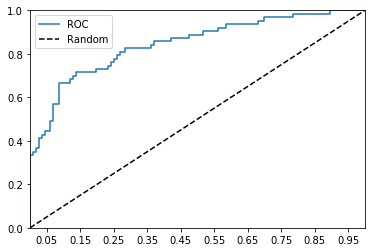

In [142]:
def roc_curve_plot(y_test, pred_proba_c1): 
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)# 임계값에 따른 FDR, TPR 값을 반환받음.
    
    plt.plot(fprs, tprs, label='ROC') # ROC 곡선을 그래프 곡선으로 그림 (label은 선 이름)
    plt.plot([0,1],[0,1], 'k--', label='Random') # 가운데 대각선 직선을 그림 (점선)
    
    # FPR X 축의 Scale을 0.1 단위로 선정하고 x축 y 축 선정 등등 해야하지만 귀찮아서 안했음
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()
roc_curve_plot(y_test, pred_proba[:, 1
                                ])

In [109]:
np.round(fprs[thr_index], 3)

# fpr 값

array([0.   , 0.017, 0.034, 0.069, 0.121, 0.138, 0.241, 0.259, 0.362,
       0.422, 0.517, 0.586, 0.698, 0.853])

In [110]:
np.round(tprs[thr_index], 3)

# tpr 값

array([0.   , 0.349, 0.429, 0.492, 0.667, 0.714, 0.746, 0.794, 0.825,
       0.873, 0.889, 0.937, 0.952, 0.984])

In [ ]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred) # 가운데 대각선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이이동할수록 
                                        # 직사각형에 가까운 곡선이 되며 좋은 ROC AUC 성능 수치를 얻게 된다. (보통 0.5 이상)
roc_score
# ROC AUC 값